# <center>Mean-Shift Clustering

In [7]:
import numpy as np    
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
%matplotlib inline

In [16]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=10000, centers=centers, cluster_std=0.4)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print("Estimated Bandwidth: %f" %bandwidth)

number of estimated clusters : 3
Estimated Bandwidth: 0.754954


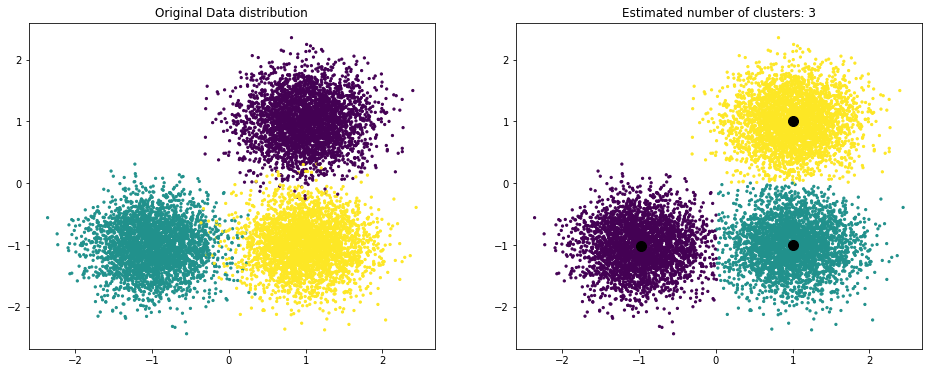

In [17]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(X[:,0],X[:,1],s=5,c=y)
ax[0].set_title('Original Data distribution')
ax[1].scatter(X[:,0],X[:,1],s=5,c=labels)
ax[1].plot(cluster_centers[:,0], cluster_centers[:,1], 'o', markersize=10,c='black')
ax[1].set_title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

---
# <center>Image Segmentation using Mean-Shift Algorithm

In [4]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
from PIL import Image

In [22]:
#Segmentation of Color Image
img = Image.open('sample.jpg')
img = np.array(img)
#Need to convert image into feature array based
flatten_img = np.reshape(img, [-1, 3])
#bandwidth estimation
est_bandwidth = estimate_bandwidth(flatten_img,quantile=0.2, n_samples=500)
mean_shift = MeanShift(est_bandwidth, bin_seeding=True)

mean_shift.fit(flatten_img)
labels= mean_shift.labels_

print("number of estimated clusters : %d" % len(np.unique(labels)))
print("Estimated Bandwidth: %f" %est_bandwidth)

number of estimated clusters : 4
Estimated Bandwidth: 71.276439


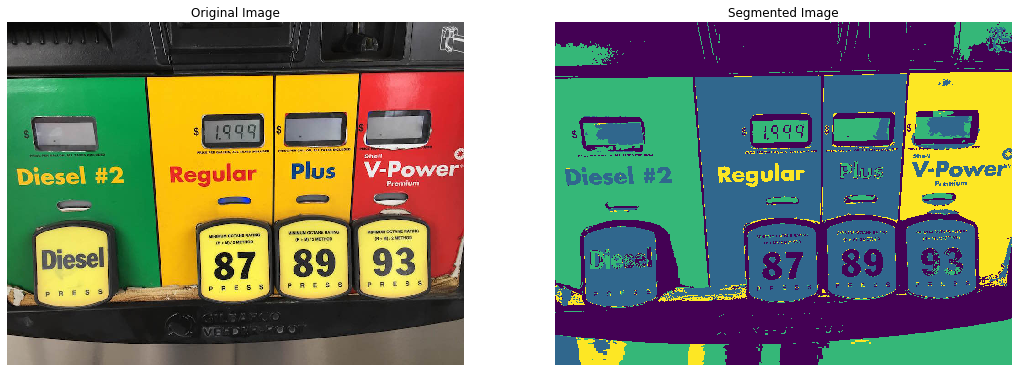

In [23]:
# Plot image vs segmented image
fig, axs = plt.subplots(1,2,figsize=(18,12))
axs[0].imshow(img)
axs[0].axis('off')
axs[0].set_title("Original Image")
axs[1].imshow(np.reshape(labels, img.shape[:-1]))
axs[1].axis('off')
axs[1].set_title("Segmented Image")
plt.show()